In [0]:
import pandas as pd

In [0]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [16]:
import os
from google.colab import files
uploaded = files.upload()
df=pd.read_excel("Validate Data.xlsx")

Saving Validate Data.xlsx to Validate Data.xlsx


In [0]:
X=df.loc[:, df.columns !='target']
Y=df.loc[:,df.columns == 'target']

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le=LabelEncoder()

In [0]:
df['job']=le.fit_transform(df['job'])
df['marital']=le.fit_transform(df['marital'])
df['education']=le.fit_transform(df['education'])
df['connect']=le.fit_transform(df['connect'])
df['landline']=le.fit_transform(df['landline'])
df['smart']=le.fit_transform(df['smart'])
df['last_month']=le.fit_transform(df['last_month'])
df['poutcome']=le.fit_transform(df['poutcome'])

In [0]:
X=df.loc[:, df.columns !='target']
Y=df.loc[:,df.columns == 'target']

In [0]:
dataset=pd.read_excel("Validate Data.xlsx")

In [0]:
le=LabelEncoder()
dataset['job']=le.fit_transform(dataset['job'])
dataset['marital']=le.fit_transform(dataset['marital'])
dataset['education']=le.fit_transform(dataset['education'])
dataset['connect']=le.fit_transform(dataset['connect'])
dataset['landline']=le.fit_transform(dataset['landline'])
dataset['smart']=le.fit_transform(dataset['smart'])
dataset['last_month']=le.fit_transform(dataset['last_month'])
dataset['poutcome']=le.fit_transform(dataset['poutcome'])

In [0]:
#X_test=df.loc[:, df.columns !='target']
#Y_test=df.loc[:,df.columns == 'target']
X_test=dataset.loc[:,dataset.columns != 'target']
Y_test=dataset.loc[:,dataset.columns =='target']

In [20]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X, Y) 
y_pred = gnb.predict(X_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(accuracy_score(Y_test, y_pred))

[[3641  359]
 [ 313  208]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      4000
           1       0.37      0.40      0.38       521

    accuracy                           0.85      4521
   macro avg       0.64      0.65      0.65      4521
weighted avg       0.86      0.85      0.85      4521

0.8513603185136032


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


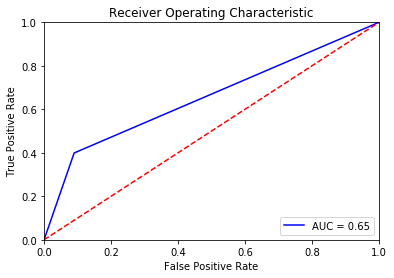

In [21]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()